In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#importing dataset
data = pd.read_csv('Country-data.csv')

In [12]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:
x=data.drop('country',axis=1)
x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(x)
scaled_data = pd.DataFrame(scaled_data, columns = x.columns)
scaled_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,3.988825e-18,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


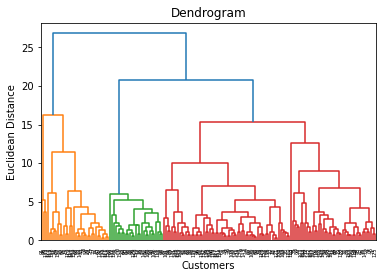

In [31]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(scaled_data,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity= 'euclidean',linkage='ward')
y_hc = hc.fit_predict(scaled_data)

In [39]:
y_hc

array([2, 4, 0, 0, 4, 0, 4, 1, 1, 4, 4, 1, 0, 4, 4, 1, 4, 2, 4, 0, 4, 4,
       0, 1, 4, 2, 2, 4, 2, 1, 4, 2, 2, 0, 0, 0, 2, 2, 0, 4, 2, 4, 4, 4,
       1, 0, 0, 0, 4, 0, 0, 4, 4, 1, 1, 0, 2, 4, 1, 0, 1, 4, 0, 2, 2, 4,
       2, 4, 1, 0, 0, 0, 0, 1, 1, 1, 4, 1, 4, 0, 2, 4, 1, 4, 0, 4, 4, 4,
       4, 1, 4, 3, 4, 2, 2, 4, 4, 2, 3, 0, 4, 4, 4, 0, 4, 4, 2, 0, 4, 0,
       1, 1, 2, 0, 1, 1, 0, 4, 4, 0, 0, 4, 1, 1, 4, 0, 2, 4, 1, 2, 4, 4,
       2, 3, 4, 4, 4, 4, 4, 1, 0, 4, 0, 4, 1, 1, 0, 2, 4, 0, 2, 4, 4, 0,
       0, 2, 4, 1, 1, 1, 0, 0, 4, 0, 4, 0, 2], dtype=int64)

In [45]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data,y_hc,metric='euclidean',random_state=42)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.219


In [53]:
from sklearn.cluster import KMeans

In [74]:
wcss=[]
silhouette_coefficients = []
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=32)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)
    print('WCSS-Cluster',i,'=',kmeans.inertia_)

WCSS-Cluster 2 = 1050.2145582853307
WCSS-Cluster 3 = 831.424435208687
WCSS-Cluster 4 = 700.52053697222
WCSS-Cluster 5 = 620.3621532663785
WCSS-Cluster 6 = 565.3667466044102
WCSS-Cluster 7 = 495.3233825951917
WCSS-Cluster 8 = 454.4544105812775
WCSS-Cluster 9 = 429.06577637877916
WCSS-Cluster 10 = 398.15560671817906


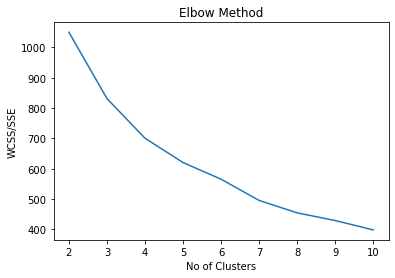

In [52]:
plt.plot(range(2,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS/SSE')
plt.show()

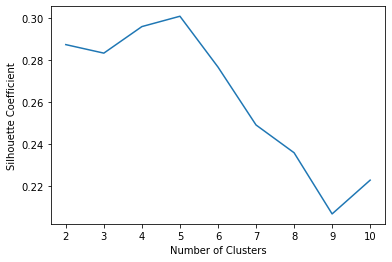

In [54]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [56]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=32)
y_kmeans=kmeans.fit(scaled_data)
cluster=kmeans.labels_
cluster

array([3, 0, 0, 3, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0,
       0, 2, 0, 3, 3, 0, 3, 2, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 2, 2,
       2, 0, 0, 0, 0, 3, 3, 0, 0, 2, 2, 3, 3, 0, 2, 3, 2, 0, 0, 3, 3, 0,
       3, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 3, 3, 2, 0, 3, 0, 0, 3,
       3, 0, 0, 1, 0, 3, 3, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       2, 2, 3, 4, 2, 0, 3, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 3, 0, 0,
       3, 1, 0, 2, 0, 3, 2, 2, 0, 0, 3, 0, 2, 2, 0, 3, 0, 3, 3, 0, 0, 0,
       0, 3, 0, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3])

In [66]:
data['cluster']=kmeans.labels_

In [60]:
data[data['cluster']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0


In [61]:
data[data['cluster']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1


In [63]:
data[data['cluster']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2


In [72]:
data[data['cluster']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,3
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,3
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,3
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,3
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,3
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,3
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,3
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,3
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,3
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,3


In [64]:
data[data['cluster']==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,4
